## Sentiment Analysis Project_Harshini_T 

### Introduction

Sentiment Analysis is a Natural Language Processing technique in text mining through which the underlying sentiment,that is positive,negative or neutral, in the text is extracted. Sentiment analysis helps in analyzing customer feedbacks,policy feedbacks, social media sentiments, reputation management of brand etc. 

Based on the availability of the labeled or unlabeled data, supervised or unsupervised technique can be applied for Sentiment analysis. 

For labeled data, the text can be vectorized and a binary classification model can be applied to extract the sentiment attached to the text. 

For unlabeled data, lexicon based sentiment analysis or deep learning techniques with pre-trained models can be applied. 

Steps involved :

1) Data input - Text input along with labeled data(based on the method,for ex- rating in yelp data),has to be cleaned for null values and anomalies. 

2) Tokenization -- The sentences are broken into tokens of words. 

3) Stop word filtering - using nlkt or spacy package stop words have to be identified in each sentence and filtered out. 

4) Stemming/Lemmatization -- Stemming or Lemmatization techniques bring the word to it base form. 

5) Sentiment Analysis -- If the data is unlabeled lexicon based sentiment analysis or deep learning techniques like transformers have to be applied for analyzing the sentiment of texts. If the data is labeled, supervised Machine learning algorithms like Naive Bayes can be applied to analyze the sentiment of the text. 

#### Loading required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import graphviz
from wordcloud import WordCloud
import missingno as miss
import re
import string
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

### Data input

In [2]:
# Read in review table from yelp database

reviews_df = pd.read_sql_table("review", "sqlite:///yelpHotelData.db")
reviews_df.shape

(688329, 10)

In [3]:
#checking how much invalid data exists
total = reviews_df.isnull().sum().sort_values(ascending=False)
percent = (reviews_df.isnull().sum()/reviews_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(39) 

,Total,Percent
date,0,0.0
reviewID,0,0.0
reviewerID,0,0.0
reviewContent,0,0.0
rating,0,0.0
usefulCount,0,0.0
coolCount,0,0.0
funnyCount,0,0.0
flagged,0,0.0
hotelID,0,0.0


No missing data!

In [4]:
# Select only reviewID, reviewContent text, rating
df = reviews_df[["reviewID", "reviewContent", "rating"]]

In [5]:
df = df.sample(9000) ## taking smaller sample for convinience

In [6]:
##checking the data types
df.dtypes

reviewID         object
reviewContent    object
rating            int64
dtype: object

### Text pre-processing -- Tokenization, Stop word filtering, Lemmatization

In [7]:
##packages needed
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
## text prerocessing  function
def process_texts(text):
  
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
     #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [9]:
df["processed_text"] = df['reviewContent'].apply(lambda x: process_texts(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


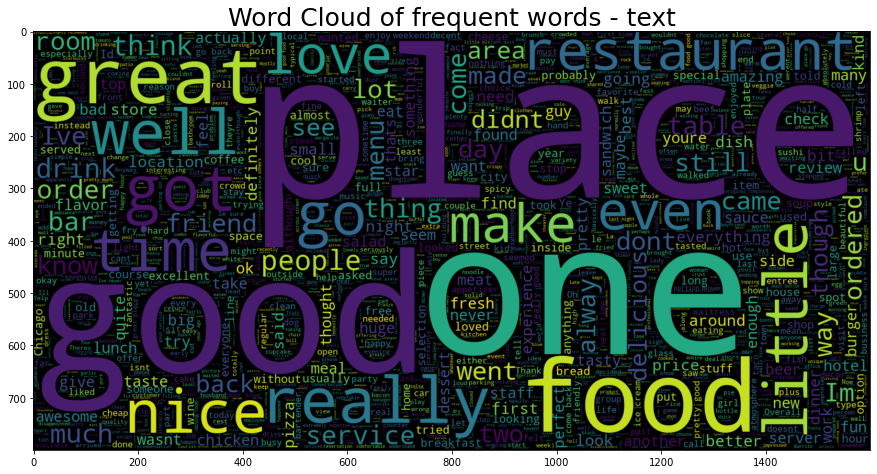

In [10]:
## Word clouds- Visualization of the text data. 

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df["processed_text"]))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words - text',fontsize=25)
plt.savefig("Word cloud 00.png")

### Ground Truth 

In [11]:
def label_sentiment (row): ## Converting rating into sentiment
   if row['rating'] < 3 :
      return 'Negative'
   if row['rating'] >= 3 :
      return 'Positive'

In [12]:
df["sentiment_gt"] = df.apply (lambda row: label_sentiment(row), axis=1)
df

,reviewID,reviewContent,rating,processed_text,sentiment_gt
17438,HxB8wp_yo-iYqJmKeNbUYQ,Usually hotel restaurants aren't much to write...,4,Usually hotel restaurant arent much write home...,Positive
648903,6AJn00YWJkOZzLEkeELxdQ,I think they just changed their name to Tribec...,5,think changed name Tribeca Taj Taj Tribeca Wev...,Positive
524960,Bhsk1npICLki-oOW7qUR9w,There are very few places to get donuts in SF....,4,There place get donut SF Were really donut kin...,Positive
261686,uPsku05kKy8_FSij32C2Tg,Dim and busy with people just hanging out and ...,4,Dim busy people hanging unisex bathroom toilet...,Positive
38156,7Jun-NP7VVhecQSQFY7tXA,Came here after day out on Sandy Point Beach f...,4,Came day Sandy Point Beach dinner Sunday eveni...,Positive
...,...,...,...,...,...
435727,cUIQUV2fKmr604QB3Wggmw,Perhaps someone at KCRW read my review. Why??...,5,Perhaps someone KCRW read review Why GARTH TRI...,Positive
206614,8gfrlHn-dRP9glocoyNAog,A round trip airfare from JFK to LAX ...,4,round trip airfare JFK LAX 550 red Mustang con...,Positive
96986,RLnBM1CVWvrrgybU8zO76w,"@ 6PM today, my boss told me to prepare for an...",4,6PM today bos told prepare another long haul R...,Positive
196614,U6TrcSV3H7WHd7lCnz3Lzg,The customer service at this location is excep...,5,The customer service location exceptional Ever...,Positive


### TextBlob

TextBlob is a python library for text analysis and is used for lexicon based sentiment analysis.Lexicon based sentiment analysis relies on rule based decision making and relies on scores assigned to already existing word corpus to detect the sentiment score of new text. 

Applying TextBlob to the text data, directly gives us with the (polarity,subjectivity) values of the text. 
Polarity - lies in the range of [-1,1] where -1 to 0 zero indicates a negatively inclined statement and 0-1 indicates positively inclined statement. 
Subjectivity -lies in the range of [0,1]. When the value is towards 1, it implies the statement is more of an opinion than factual information. 

Let us work with TextBlob now!

In [13]:
def polarity(text):
    try:
        return TextBlob(text).sentiment ##applying textblob
    except:
        return None

df['polarity'] = df["processed_text"].apply(polarity)
df.head(3)

,reviewID,reviewContent,rating,processed_text,sentiment_gt,polarity
17438,HxB8wp_yo-iYqJmKeNbUYQ,Usually hotel restaurants aren't much to write...,4,Usually hotel restaurant arent much write home...,Positive,"(0.23756613756613762, 0.5367724867724868)"
648903,6AJn00YWJkOZzLEkeELxdQ,I think they just changed their name to Tribec...,5,think changed name Tribeca Taj Taj Tribeca Wev...,Positive,"(0.26666666666666666, 0.38333333333333336)"
524960,Bhsk1npICLki-oOW7qUR9w,There are very few places to get donuts in SF....,4,There place get donut SF Were really donut kin...,Positive,"(0.14633699633699634, 0.4761904761904762)"


In [14]:
df[['pol','sub']] = pd.DataFrame(df["polarity"].tolist(), index= df.index)
df.head(3) ## seperating polairty score

,reviewID,reviewContent,rating,processed_text,sentiment_gt,polarity,pol,sub
17438,HxB8wp_yo-iYqJmKeNbUYQ,Usually hotel restaurants aren't much to write...,4,Usually hotel restaurant arent much write home...,Positive,"(0.23756613756613762, 0.5367724867724868)",0.237566,0.536772
648903,6AJn00YWJkOZzLEkeELxdQ,I think they just changed their name to Tribec...,5,think changed name Tribeca Taj Taj Tribeca Wev...,Positive,"(0.26666666666666666, 0.38333333333333336)",0.266667,0.383333
524960,Bhsk1npICLki-oOW7qUR9w,There are very few places to get donuts in SF....,4,There place get donut SF Were really donut kin...,Positive,"(0.14633699633699634, 0.4761904761904762)",0.146337,0.476190


In [15]:
del df["polarity"] ## deleting columns not required
del df["sub"]

In [16]:
df.dtypes

reviewID           object
reviewContent      object
rating              int64
processed_text     object
sentiment_gt       object
pol               float64
dtype: object

In [17]:
def label_sentiment (row): ##converting the polarity value into sentiment
   if row['pol'] < 0 :
      return 'Negative'
   if row['pol'] >= 0 :
      return 'Positive'

In [18]:
df["sentiment_tb"] = df.apply (lambda row: label_sentiment(row), axis=1)
df

,reviewID,reviewContent,rating,processed_text,sentiment_gt,pol,sentiment_tb
17438,HxB8wp_yo-iYqJmKeNbUYQ,Usually hotel restaurants aren't much to write...,4,Usually hotel restaurant arent much write home...,Positive,0.237566,Positive
648903,6AJn00YWJkOZzLEkeELxdQ,I think they just changed their name to Tribec...,5,think changed name Tribeca Taj Taj Tribeca Wev...,Positive,0.266667,Positive
524960,Bhsk1npICLki-oOW7qUR9w,There are very few places to get donuts in SF....,4,There place get donut SF Were really donut kin...,Positive,0.146337,Positive
261686,uPsku05kKy8_FSij32C2Tg,Dim and busy with people just hanging out and ...,4,Dim busy people hanging unisex bathroom toilet...,Positive,0.360606,Positive
38156,7Jun-NP7VVhecQSQFY7tXA,Came here after day out on Sandy Point Beach f...,4,Came day Sandy Point Beach dinner Sunday eveni...,Positive,0.307830,Positive
...,...,...,...,...,...,...,...
435727,cUIQUV2fKmr604QB3Wggmw,Perhaps someone at KCRW read my review. Why??...,5,Perhaps someone KCRW read review Why GARTH TRI...,Positive,0.466667,Positive
206614,8gfrlHn-dRP9glocoyNAog,A round trip airfare from JFK to LAX ...,4,round trip airfare JFK LAX 550 red Mustang con...,Positive,0.244780,Positive
96986,RLnBM1CVWvrrgybU8zO76w,"@ 6PM today, my boss told me to prepare for an...",4,6PM today bos told prepare another long haul R...,Positive,0.120255,Positive
196614,U6TrcSV3H7WHd7lCnz3Lzg,The customer service at this location is excep...,5,The customer service location exceptional Ever...,Positive,0.455000,Positive


## Transformers

Transformers is a deep learning technique that comes handy for text analysis and sentiment analysis. 
Using Transformers package, we build a sentiment analysis pipeline already available in the package. By applying this we will get the Positive/Negative sentiment score of the text data. 

In [19]:
from transformers import pipeline ## transformers
cls = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
def polarity_trns(text):
    try:
        return cls(text)
    except:
        return None
df['polarity_trns'] = df["processed_text"].apply(polarity_trns)

Token indices sequence length is longer than the specified maximum sequence length for this model (566 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
df

In [ ]:
df.dtypes ##  checking dtypes

### Results

In [ ]:
df["sentiment_gt"].value_counts() ## final outcome

In [ ]:
df["sentiment_tb"].value_counts()## final outcome

### Comparision of TextBlob vs Transformers

- TextBlob is computationally less demanding
- Transformers  took lot of time and processing power to process the data unlike TextBlob which took a lot less time to process. 
- TextBlob being rule based isnt felixible like transformers to learn from new data. 
- TextBlob doesnt know how to process the words that doesnot exist in the lexical corpus unlike transformers that can learn and apply from existing data. 
- But for precise results when the data set is large enough, Transformers is more accurate than textblob. 



### Conclusion

Unlabelled approaches like TextBlob and Transformers has a decent prediction similar to the star ratings. I believe start rating can be dropped from survey's and we can still get reliable customer insights using unlabelled approaches . Though there is some percentage of error in the prediction on unlabelled approaches compared  with the star ratings, with larger sample sizes the error value would be reduced and unlabelled approaches can give valuable customer insights. Also there are many instances when star ratings are not collected or they are not accurate and precise and text based opinion. Hence, unlabelled approaches are well applicable for large sampled datasets for sentiment analysis. 


### Recommendations

1) For large datasets, when computational costs and time aren't an issue, transformers is more ideal for accurate predictions. 
2) In general most of the datasets are relatively smaller and companies cannot invest on large computational capacities and hence, TextBlob comes handy in majority of the uase cases. 